# Brain Tumor Classification

## Clone the Github Repo to access the Dataset

In [ ]:
!git clone https://github.com/Ashish-Arya-CS/Coursera-Content.git

Cloning into 'Coursera-Content'...
remote: Enumerating objects: 3049, done.
remote: Counting objects: 100% (3049/3049), done.
remote: Compressing objects: 100% (3046/3046), done.
remote: Total 3049 (delta 1), reused 3043 (delta 0), pack-reused 0
Receiving objects: 100% (3049/3049), 79.25 MiB | 34.80 MiB/s, done.
Resolving deltas: 100% (1/1), done.


## Import necessary Libraries 

In [ ]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    


## Creating Directories to store Cropped Images

In [ ]:
# Create Directory for Training Data
os.mkdir("/content/Crop_Brain_MRI")
os.mkdir("/content/Crop_Brain_MRI/glioma_tumor")
os.mkdir("/content/Crop_Brain_MRI/meningioma_tumor")
os.mkdir("/content/Crop_Brain_MRI/no_tumor")
os.mkdir("/content/Crop_Brain_MRI/pituitary_tumor")

FileExistsError: ignored

In [ ]:
# Create Directory for Testing Data
os.mkdir("/content/Test_Data")
os.mkdir("/content/Test_Data/glioma_tumor")
os.mkdir("/content/Test_Data/meningioma_tumor")
os.mkdir("/content/Test_Data/no_tumor")
os.mkdir("/content/Test_Data/pituitary_tumor")

## Data Visualization

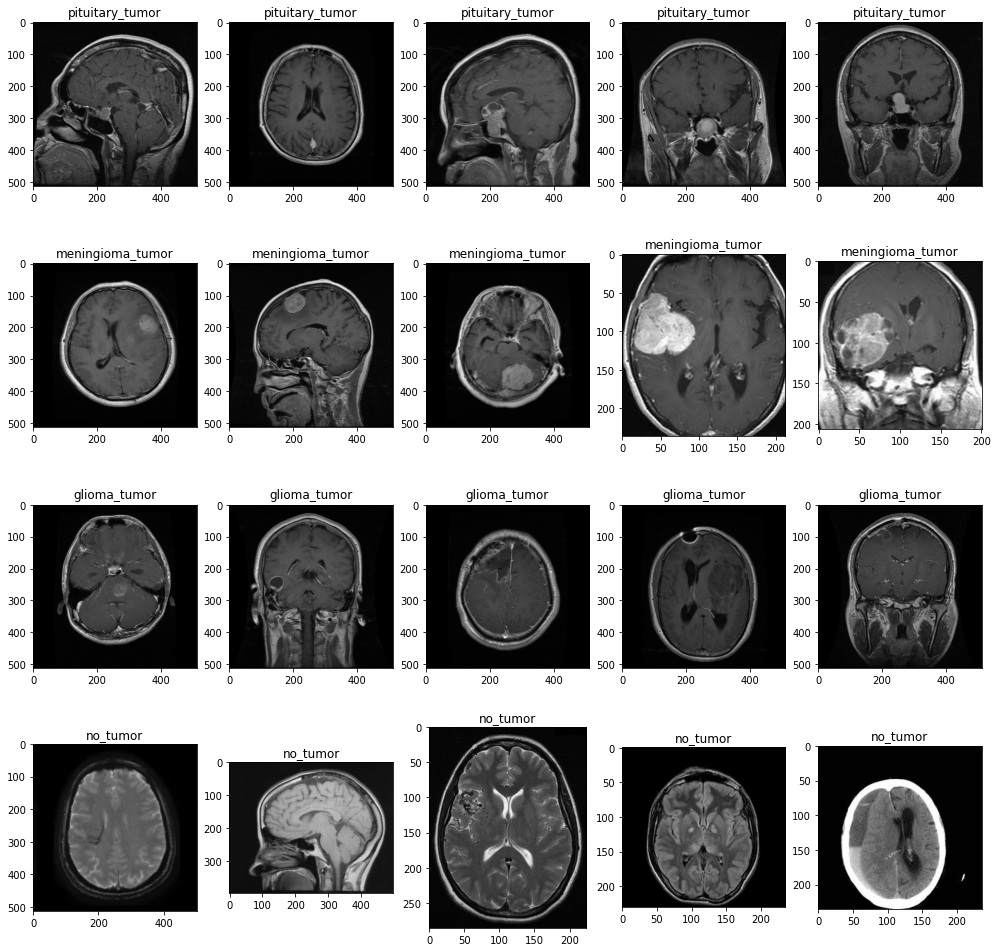

In [ ]:
train_dir="/content/Coursera-Content/Brain-MRI/Training/"
test_dir="/content/Coursera-Content/Brain-MRI/Testing/"
classes=os.listdir("/content/Coursera-Content/Brain-MRI/Training")
files_path_dict={}


for c in classes:
  files_path_dict[c]=list(map(lambda x :train_dir+c+'/'+x,os.listdir(train_dir+c)))#usage of lambda as an iterator in diff training folders

plt.figure(figsize=(17,17))
index=0

for c in classes:
  random.shuffle(files_path_dict[c])
  path_list=files_path_dict[c][:6]#accessing first five files of the dictionary

  for i in range(1,6):
    index+=1
    plt.subplot(4,5,index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

## Create a Function to Crop Images

In [ ]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image


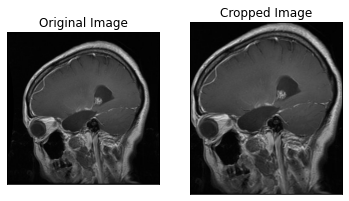

In [ ]:
example_img=cv2.imread("/content/Coursera-Content/Brain-MRI/Training/glioma_tumor/gg (101).jpg")
cropped_image=crop_image(example_img,plot=True)

## Saving The Cropped Images 

In [ ]:
# Crop the Training Images and Save it to the Directory we previously cretaed
glioma=train_dir+""

In [ ]:
# Crop the Testing Images and Save it to the Directory we previously cretaed

## Perform Data Augmentation and Prepare the Train, Validation and Test Dataset

In [ ]:
# Use Image Data Generator to perform this task.

In [ ]:
# View the class dictionary

In [ ]:
# View the augmented data.

## Build and Compile the Model 

In [ ]:
# Build the Model

## Model Training and Model Evaluation

In [ ]:
# Train the model

In [ ]:
# Plot the training curves

In [ ]:
# Evaluate the model on Test Set

## Obtaining Predictions on Test Images

In [ ]:
# Obtain Predictions on Test Images